# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score


# Optional: Show plots inline
%matplotlib inline


### Read the csv data into a pandas dataframe and display the first 5 samples

In [39]:
# Replace the path below with your actual file path if needed
file_path = r"C:\Users\14163\Desktop\university cu boulder\GorgeBrown\Mashine Learning 1\Assignment 6\Real estate.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 samples
df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [40]:
# Show general info: column names, non-null counts, and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [41]:
# Show summary statistics for all numeric columns
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Find how many samples are there and how many columns are there in the dataset

In [42]:
# Find the number of rows (samples) and columns (features)
num_rows, num_columns = df.shape

print(f"Number of samples (rows): {num_rows}")
print(f"Number of features (columns): {num_columns}")


Number of samples (rows): 414
Number of features (columns): 8


### What are the features available in the dataset?

In [43]:
# Show the list of all columns in the dataset
print("Features in the dataset:")
print(df.columns.tolist())


Features in the dataset:
['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']


### Check if any features have missing data

In [44]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


### Group all the features as dependent features in X

In [45]:
# Ensure "No" column is included in the features
X = df.drop(columns=["Y house price of unit area"])

# Confirm the shape is 414 rows and 7 columns
print(f"Shape of X: {X.shape}")

# Display the top rows
X.head()


Shape of X: (414, 7)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


### Group feature(s) as independent features in y

In [46]:
# Step 8: Assign the target variable
y = df["Y house price of unit area"]

# Show structured view: first and last 5 values + summary
from IPython.display import display, Markdown

display(Markdown("###Target Variable: `Y house price of unit area`"))
display(Markdown(f"- Total samples: **{len(y)}**"))
display(Markdown("#### First 5 entries:"))
display(y.head())

display(Markdown("#### Last 5 entries:"))
display(y.tail())

display(Markdown("#### Data Type:"))
print(f"{y.name}, dtype: {y.dtype}")


###Target Variable: `Y house price of unit area`

- Total samples: **414**

#### First 5 entries:

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

#### Last 5 entries:

409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, dtype: float64

#### Data Type:

Y house price of unit area, dtype: float64


### Split the dataset into train and test data

In [47]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the shapes to confirm
print(f"Training set:   X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set:    X_test  = {X_test.shape}, y_test  = {y_test.shape}")


Training set:   X_train = (331, 7), y_train = (331,)
Testing set:    X_test  = (83, 7), y_test  = (83,)


### Choose the model (Linear Regression)

In [48]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Confirm training completion
print("Linear Regression model has been trained successfully.")


Linear Regression model has been trained successfully.


### Create an Estimator object

In [49]:
# Step 11: Create an Estimator Object
from sklearn.linear_model import LinearRegression

# Create the estimator (Linear Regression model)
estimator = LinearRegression()

# Fit the model to training data
estimator.fit(X_train, y_train)

print("Estimator object created and model fitted.")


Estimator object created and model fitted.


### Train the model

In [50]:
# Step 12: Train the model
# (This is already done in the previous step, but shown again for clarity)

estimator.fit(X_train, y_train)

print(" Model trained successfully on the training set.")


 Model trained successfully on the training set.


### Apply the model

In [51]:
# Step 13 (Revised): Apply the model and show predictions as a NumPy array
y_pred = estimator.predict(X_test)

# Show predictions in array format
print("array :", np.array2string(np.array(y_pred), separator=', ', threshold=np.inf))


array : [47.04645871, 40.40783016, 43.37463978, 39.20600382, 26.62817953,
 45.8923956 , 44.33888897, 46.74448468, 24.43235155, 55.06258487,
 34.60848974, 36.92386329, 36.76420984, 24.30494918, 35.79519845,
 33.44810036, 44.24993318, 44.98654734, 29.18096544, 44.80711275,
  1.15259949, 36.10694406, 47.26486776, 45.90792727, 10.96198835,
 38.69069634, 12.57701679, 43.61237869, 35.7142565 , 37.55475044,
 14.14012034, 40.46209983, 35.90891223, 28.5174525 , 47.38286733,
 30.9022379 , 50.43545093, 12.92669013, 48.95222574, 39.27068588,
 39.3872837 , 40.09381011, 48.20107097, 37.08010208, 39.54765933,
 47.348201  , 43.3815801 , 21.07747224, 47.05299802, 44.57951775,
 48.24233055, 48.12297596, 41.42189435, 42.25141469, 36.32214409,
 15.69024514, 37.64733588, 35.12221291, 29.08561558, 46.86297981,
 32.07763941, 33.25961566, 15.22965501,  9.01697131,  9.37929873,
 33.78712833, 29.59931587, 47.50139803, 33.81312917, 31.84174056,
 46.48732668, 38.98112924, 46.72835605, 45.6962431 , 35.99239567,
 3

### Display the coefficients

In [52]:
print("array(", end="")
print(np.array2string(estimator.coef_, separator=', ', precision=8, suppress_small=False), end=")\n")


array([-5.61695287e-03,  5.40743502e+00, -2.67827999e-01, -4.81543315e-03,
  1.08114445e+00,  2.26048799e+02, -3.01254914e+01])


### Find how well the trained model did with testing data

In [53]:
# Predict again to be safe
y_pred = estimator.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display results
print(f"R² Score:  {r2:.4f}")
print(f"RMSE:      {rmse:.4f}")


R² Score:  0.6745
RMSE:      7.3893


### Plot House Age Vs Price
#### Hint: Use regplot in sns

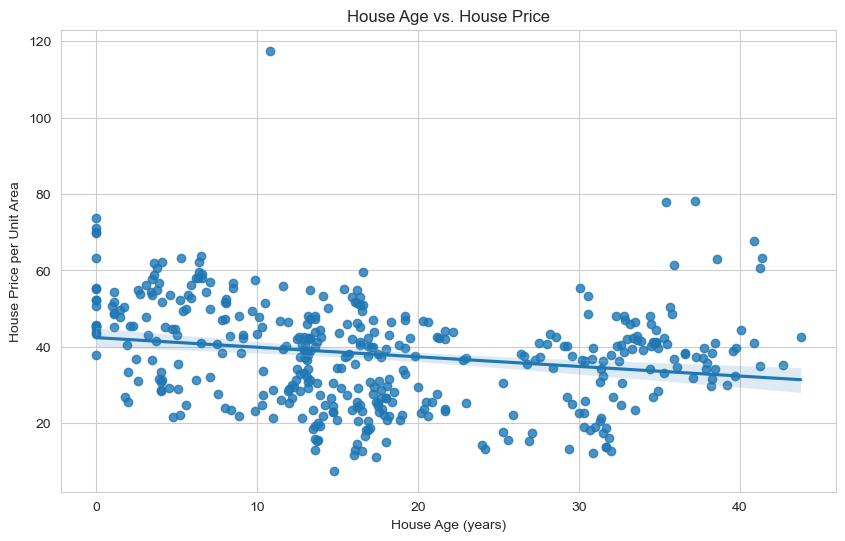

In [54]:
# Set the plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the regression plot
sns.regplot(x="X2 house age", y="Y house price of unit area", data=df)

# Add labels and title
plt.xlabel("House Age (years)")
plt.ylabel("House Price per Unit Area")
plt.title("House Age vs. House Price")

# Show the plot
plt.show()


### Plot Distance to MRT station Vs Price

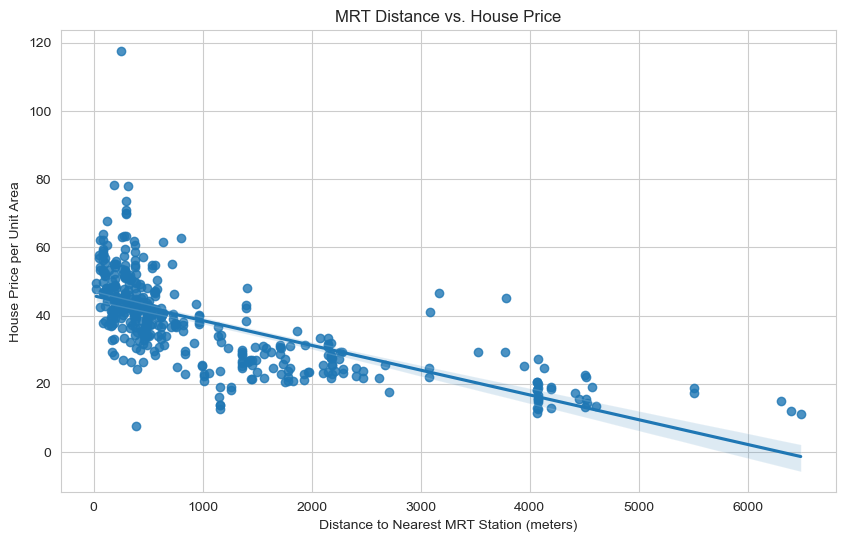

In [55]:
# Set the plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the regression plot
sns.regplot(x="X3 distance to the nearest MRT station", y="Y house price of unit area", data=df)

# Add labels and title
plt.xlabel("Distance to Nearest MRT Station (meters)")
plt.ylabel("House Price per Unit Area")
plt.title("MRT Distance vs. House Price")

# Show the plot
plt.show()


### Plot Number of Convienience Stores Vs Price

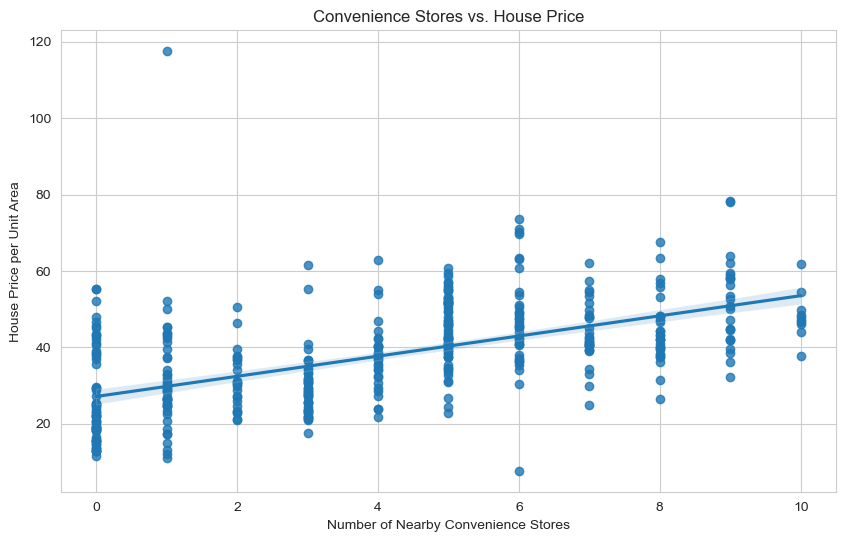

In [56]:
# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create regression plot
sns.regplot(
    x="X4 number of convenience stores",
    y="Y house price of unit area",
    data=df
)

# Add labels and title
plt.xlabel("Number of Nearby Convenience Stores")
plt.ylabel("House Price per Unit Area")
plt.title("Convenience Stores vs. House Price")

# Show the plot
plt.show()
